<a href="https://colab.research.google.com/github/amanch9988/Th-Spark-Foundation--GRIP/blob/main/Sparks_GRIP_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Name : Aman Choudhary**

# **GRIP @The Sparks Foundation**
Data Science and Business Analytics Intern
### **Task 2: Prediction using unsupervised ML**
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually using unsupervised Machine Learning.


In [1]:
#import requried libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [4]:
#importing data from url given

data = pd.read_csv('Iris.csv')
print("Data imported successfully")

Data from url imported successfully


In [5]:
#displaying the data

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#checking the total data

data.shape

(150, 6)

In [16]:
# Getting the statistical information
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#checking datatypes of given data


data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#checking for duplicate

data.duplicated().sum()

0

In [11]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# **Finding the optimum number of clusters**

In [12]:
# The optimum number of clusters is where the Elbow occurs.


X = data.iloc[:, [1,2,3,4]].values

In [13]:
# import library

from sklearn.cluster import KMeans

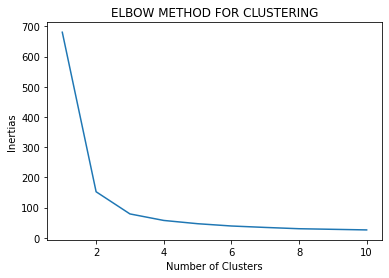

In [15]:
#plotting and checking for elbow

def elbowMethod(num_clusters, inertias):
    plt.plot(num_clusters, inertias)
    plt.title("ELBOW METHOD FOR CLUSTERING")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertias")
    plt.show()

inertias = []
clusters = range(1,11)

for i in clusters:
    kmeans = KMeans(n_clusters = i, init='k-means++',  max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
elbowMethod(clusters, inertias)

**RESULT :** It is clear from above plot that the optimum number of clusters can be chosen as "3". 

In [18]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

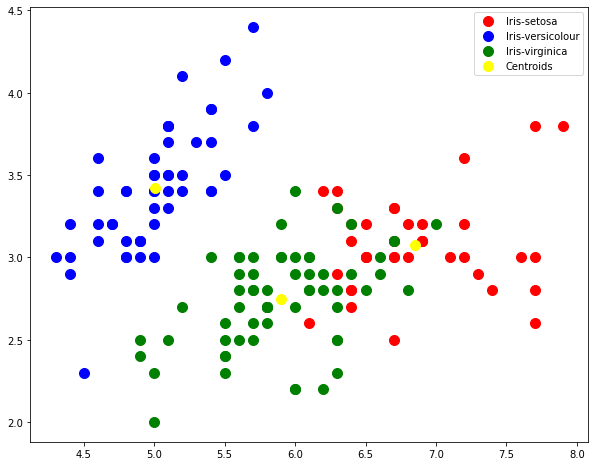

In [23]:
plt.figure(figsize = (10,8))       # size of plot

# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

plt.show()
